## HOBO Temperature Logger Plotting
This notebook shows how to take the output from a HOBO temperature logger, manipulate the log file and plot the temperature data against time.

The data file we will be using is from the HOBO "Water Temp Pro v2" temperature data logger installed in Wilson Creek during the time from September 26, 2013 to October 13, 2014. Raw HOBO data files have a non-unicde character in the header line (the degree symbol). The simplest way to repair this is to open the file in Notebook, Excel or a similar program and delete the symbol.  This has been done on the example file but needs to be done on all HOBO input files in the CB Water Hub.

Rather than hard code a URL into the script, a small tkinter window will open to allow the user to browse for the file on their computer.

Jan 10, 2021  T.V.

In [1]:
# =============== import libraries ===========
import re
import tkinter as tk
from tkinter import filedialog
import pandas as pd

# set up basic window
root= tk.Tk()
canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def getCSV ():
    global df
    import_file_path = filedialog.askopenfilename()
    df = pd.read_csv (import_file_path)
    print (df.head())
    root.destroy()                         #closes the window after the file has been selected.

# Open window with a "Browse Button" to find the file
browseButton_CSV = tk.Button(text="      Import CSV File     ", command=getCSV, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 150, window=browseButton_CSV)

root.mainloop()

# =============================================  

   id Date Time, GMT-07:00  Temp, C  Batt, V
0  14        9/26/13 12:00    7.920     3.63
1  15        9/26/13 14:00    8.220     3.63
2  16        9/26/13 16:00    8.519     3.63
3  17        9/26/13 18:00    8.494     3.63
4  18        9/26/13 20:00    8.469     3.63


#### HOBO temperature log files
The data logger records the temperature at the time interval specified when the logger is activated and set up. In the above example it is logging the temperature every 2 hours. It also logs the battery voltage.

The coding cell above populated a Pandas dataframe with the values. The "id" is simply the log number. In this case the first 13 temperatures were discarded because the unit was recording air tempertures prior to being installed in the creek. This can easily be done using 'Notepad'. The heading on the temperature column can be replaced with something like 'temp' as can all of the columns. The cell below renames the date/time column for simplicity when refering to it in the code.

Since this is a csv file the data is simply a series of strings separated by commas, however, Pandas interprets the "id" as an integer and the temp and voltage as floating point numbers. The date/time is just an object. The "df.info()" confirms that there are no "null" values. If there were we would need to clean up the dataset to handle the "null" values. See https://www.w3schools.com/python/pandas_cleaning_empty_cells.asp for methods of cleaning up the "null" or badly formatted cells.

In [2]:
# Confirm that there are no "null" values in the dataframe
print (df.info())

# rename the second and third columns for simplisity. a new dataframe is set up so we do not disturb the original.
df1 = df.rename(columns = {'Date Time, GMT-07:00': 'time', 'Temp, C': 'temp'}, inplace = False)
print (df1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 4 columns):
id                      4585 non-null int64
Date Time, GMT-07:00    4585 non-null object
Temp, C                 4585 non-null float64
Batt, V                 4585 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 143.4+ KB
None
   id           time   temp  Batt, V
0  14  9/26/13 12:00  7.920     3.63
1  15  9/26/13 14:00  8.220     3.63
2  16  9/26/13 16:00  8.519     3.63
3  17  9/26/13 18:00  8.494     3.63
4  18  9/26/13 20:00  8.469     3.63


### Parse the "time" column
The following section splits out the hours from the rest of the "time" column based upon the blank in the string. The "date" section is then split into "month, "day" and "year" columns. the orginal column has been left in so tht one can confirm that everything is working as it should be.

In [4]:
# split "time" string on blank
hours = []
dates = []
for i in range(0,len(df1)):
    date, hr = df1.iloc[i,1].split()
    hours.append(hr)
    dates.append(date)

df1['hour'] =hours
df1['date'] =dates

# split the date string to year, month and day
years =[]
months =[]
days =[]
for i in range(0,len(df1)):
    mon, day, yr = df1.iloc[i,5].split('/')
    months.append(mon)
    days.append(day)
    years.append(int(yr)+2000)
    
#add columns to dataframe
df1['day'] = days
df1['month'] = months
df1['year'] = years

#finally remove the date column
df1.drop(['date'], axis=1, inplace=True)

print (df1.head())

   id           time   temp  Batt, V   hour day month  year
0  14  9/26/13 12:00  7.920     3.63  12:00  26     9  2013
1  15  9/26/13 14:00  8.220     3.63  14:00  26     9  2013
2  16  9/26/13 16:00  8.519     3.63  16:00  26     9  2013
3  17  9/26/13 18:00  8.494     3.63  18:00  26     9  2013
4  18  9/26/13 20:00  8.469     3.63  20:00  26     9  2013


### Plot the full temperature profile
Plot the temperature against time to see the full picture. A new list is created, using the format "yr-mon-day time", for plotting.

In [5]:
# convert 'time to' conventional format "yr-mon-day time"
x = []
y = []

for i in range(0,len(df1)):
    datetime = str(df1.iloc[i,7]) + '-' + str(df1.iloc[i,6]) + '-' + str(df1.iloc[i,5]) + ' ' + str(df1.iloc[i,4])
    #print (datetime)
    x.append(datetime)
    y.append(df1.iloc[i,2])
    
#print (x[0:4], y[0:4])

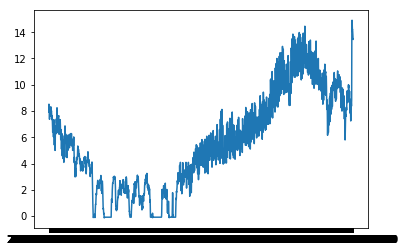

In [6]:
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ This cell took 5 minutes to plot on the Pavilion dm4 $$$$$$$$$$$$$$$$
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y)
plt.show()  

# $$$$$$$$$$$$$$$$$$$$ should be revised to avarage each day $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

### Plot yearly temperatures profile on the same graph
For comparison, yearly plots on the same graph show the annual changes. <Script to be developed>